# Introduction
This project is for the capstone project for [Google's Data Analyics Certificate](https://grow.google/dataanalytics/?utm_source=gDigital&utm_medium=paidha&utm_campaign=sem-bk-data-phr-glp-br&utm_term=data%20analytics%20google%20certification&gclid=CjwKCAjwm7mEBhBsEiwA_of-THjKDCf3ioMP-gPDbpA46oMIq13tcMtsxjYPifxRHcgApv3HEq0WTBoCpe0QAvD_BwE#?modal_active=none) [Case Study 1: How Does a Bike-Share Navigate Speedy Success?]
Task: Identify how members use the bike share service differently than casual riders.
Hypothesis: Members use bike for commuting to work and casual riders are tourists or riding for fun.

Project completed by: Sudhakar Rao
Date: 2021/05/28

# Problem Statement
Cyclistic bike-share wants to convert casual riders to members. The assigned task is to identify how the rider groups use the bike-share differently.

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
q2_2019 <- read_csv("/home/sudhakar/Downloads/Bike_Share_Data/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/home/sudhakar/Downloads/Bike_Share_Data/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/home/sudhakar/Downloads/Bike_Share_Data/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("/home/sudhakar/Downloads/Bike_Share_Data/Divvy_Trips_2020_Q1.csv")

Parsed with column specification:
cols(
  `01 - Rental Details Rental ID` = col_double(),
  `01 - Rental Details Local Start Time` = col_datetime(format = ""),
  `01 - Rental Details Local End Time` = col_datetime(format = ""),
  `01 - Rental Details Bike ID` = col_double(),
  `01 - Rental Details Duration In Seconds Uncapped` = col_number(),
  `03 - Rental Start Station ID` = col_double(),
  `03 - Rental Start Station Name` = col_character(),
  `02 - Rental End Station ID` = col_double(),
  `02 - Rental End Station Name` = col_character(),
  `User Type` = col_character(),
  `Member Gender` = col_character(),
  `05 - Member Details Member Birthday Year` = col_double()
)
Parsed with column specification:
cols(
  trip_id = col_double(),
  start_time = col_datetime(format = ""),
  end_time = col_datetime(format = ""),
  bikeid = col_double(),
  tripduration = col_number(),
  from_station_id = col_double(),
  from_station_name = col_character(),
  to_station_id = col_double(),
  to_station

### Cleaning Data

In [3]:
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

## Renaming and Columns q2_2019

In [4]:
q4_2019 <- q4_2019 %>%
    rename(ride_id = trip_id)%>%
    rename(rideable_type = bikeid)%>%
    rename(started_at = start_time)%>%
    rename(ended_at = end_time)%>%
    rename(start_station_name = from_station_name)%>%
    rename(start_station_id = from_station_id)%>%
    rename(end_station_name = to_station_name)%>%
    rename(end_station_id = to_station_id)%>%
    rename(member_casual = usertype)
q3_2019 <- q3_2019 %>%
    rename(ride_id = trip_id)%>%
    rename(rideable_type = bikeid)%>%
    rename(started_at = start_time)%>%
    rename(ended_at = end_time)%>%
    rename(start_station_name = from_station_name)%>%
    rename(start_station_id = from_station_id)%>%
    rename(end_station_name = to_station_name)%>%
    rename(end_station_id = to_station_id)%>%
    rename(member_casual = usertype)
q2_2019 <- q2_2019 %>%
    rename(ride_id = '01 - Rental Details Rental ID')%>%
    rename(rideable_type = '01 - Rental Details Bike ID')%>%
    rename(started_at = '01 - Rental Details Local Start Time') %>%
    rename(ended_at = '01 - Rental Details Local End Time') %>%
    rename(start_station_name = '03 - Rental Start Station Name') %>%
    rename(start_station_id = '03 - Rental Start Station ID') %>%
    rename(end_station_name = '02 - Rental End Station Name') %>%
    rename(end_station_id = '02 - Rental End Station ID') %>%
    rename(member_casual = 'User Type') %>%
    rename(gender = 'Member Gender') %>%
    rename(birthyear = '05 - Member Details Member Birthday Year')

## Convert data type to character to be consistent with q1_2020

In [5]:
q4_2019$ride_id = as.character(q4_2019$ride_id)
q4_2019$rideable_type = as.character(q4_2019$rideable_type)

q3_2019$ride_id = as.character(q3_2019$ride_id)
q3_2019$rideable_type = as.character(q3_2019$rideable_type)

q2_2019$ride_id = as.character(q2_2019$ride_id)
q2_2019$rideable_type = as.character(q2_2019$rideable_type)

## Checking work to confirm Coumns have been renamed and data type is consistent

In [6]:
str(q2_2019)
str(q3_2019)
str(q4_2019)
str(q1_2020)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1108163 obs. of  12 variables:
 $ ride_id                                         : chr  "22178529" "22178530" "22178531" "22178532" ...
 $ started_at                                      : POSIXct, format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at                                        : POSIXct, format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type                                   : chr  "6251" "6226" "5649" "4151" ...
 $ 01 - Rental Details Duration In Seconds Uncapped: num  446 1048 252 357 1007 ...
 $ start_station_id                                : num  81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name                              : chr  "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id                                  : num  56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name                 

## Combining data into one dataframe

In [7]:
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

## Removing columns that arent' needed

In [8]:
all_trips <- all_trips %>%
    select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", tripduration))

In [9]:
glimpse(all_trips)
nrow(all_trips)
summary(all_trips)

Observations: 3,879,822
Variables: 9
$ ride_id            <chr> "22178529", "22178530", "22178531", "22178532", "2…
$ started_at         <dttm> 2019-04-01 00:02:22, 2019-04-01 00:03:02, 2019-04…
$ ended_at           <dttm> 2019-04-01 00:09:48, 2019-04-01 00:20:30, 2019-04…
$ rideable_type      <chr> "6251", "6226", "5649", "4151", "3270", "3123", "6…
$ start_station_id   <dbl> 81, 317, 283, 26, 202, 420, 503, 260, 211, 211, 30…
$ start_station_name <chr> "Daley Center Plaza", "Wood St & Taylor St", "LaSa…
$ end_station_id     <dbl> 56, 59, 174, 133, 129, 426, 500, 499, 211, 211, 23…
$ end_station_name   <chr> "Desplaines St & Kinzie St", "Wabash Ave & Rooseve…
$ member_casual      <chr> "Subscriber", "Subscriber", "Subscriber", "Subscri…


[1] 3879822

   ride_id            started_at                     ended_at                  
 Length:3879822     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-23 07:49:09   1st Qu.:2019-06-23 08:20:27  
 Mode  :character   Median :2019-08-14 17:43:38   Median :2019-08-14 18:02:04  
                    Mean   :2019-08-26 00:49:59   Mean   :2019-08-26 01:14:37  
                    3rd Qu.:2019-10-12 12:10:21   3rd Qu.:2019-10-12 12:36:16  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3879822     Min.   :  1.0    Length:3879822     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.9                       Mean   :203.8  


## Renaming data for consistency
Changing Subsriber to member & Customer to casual


In [10]:
all_trips$member_casual <- gsub("Subscriber","member", all_trips$member_casual)
all_trips$member_casual <- gsub("Customer","casual", all_trips$member_casual)

In [11]:
unique(all_trips$member_casual)

[1] "member" "casual"

## Adding columtns for date and time analysis

In [12]:
all_trips$date <- as.Date(all_trips$started_at) 
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)
all_trips$ride_length_min <- difftime(all_trips$ended_at,all_trips$started_at)/60

In [13]:
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)
all_trips$ride_length_min <- as.numeric(as.character(all_trips$ride_length_min))
is.numeric(all_trips$ride_length_min)


[1] FALSE

[1] TRUE

[1] TRUE

## Removing maintenance trips and trips less with no length from the dataset

In [14]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]


In [15]:
summary(all_trips_v2)

   ride_id            started_at                     ended_at                  
 Length:3876042     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-22 23:44:33   1st Qu.:2019-06-23 00:16:46  
 Mode  :character   Median :2019-08-14 16:56:35   Median :2019-08-14 17:15:04  
                    Mean   :2019-08-25 20:15:33   Mean   :2019-08-25 20:40:12  
                    3rd Qu.:2019-10-11 23:23:20   3rd Qu.:2019-10-12 00:26:13  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3876042     Min.   :  1.0    Length:3876042     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.4                       Mean   :203.3  
                    3rd Qu.:290.0                       3rd Qu.:291.0  
        

In [16]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,3552.7502
member,850.0662


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,1546
member,589


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,2
member,1


##Analyzing rides by day of week
* Total number of rides comparing Members to Casual riders
* Average trip duration comparing Members to Casual riders

In [17]:
total_rides <- all_trips_v2 %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>%
    group_by(member_casual, weekday) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length_min)) %>%
    arrange(member_casual, weekday)
write.csv(total_rides, "total_rides_min.csv")
head(total_rides)

member_casual,weekday,number_of_rides,average_duration
casual,Sun,181293,59.69009
casual,Mon,103296,56.20478
casual,Tue,90510,59.93933
casual,Wed,92457,61.97770
casual,Thu,102679,61.38308
casual,Fri,122404,62.89725


In [18]:
library(scales)


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


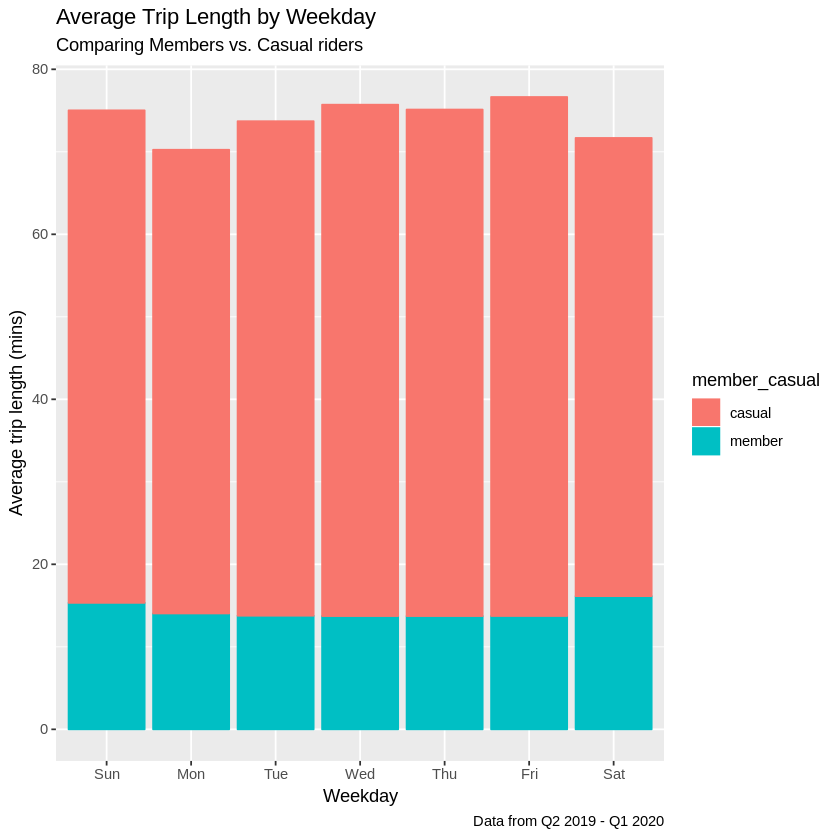

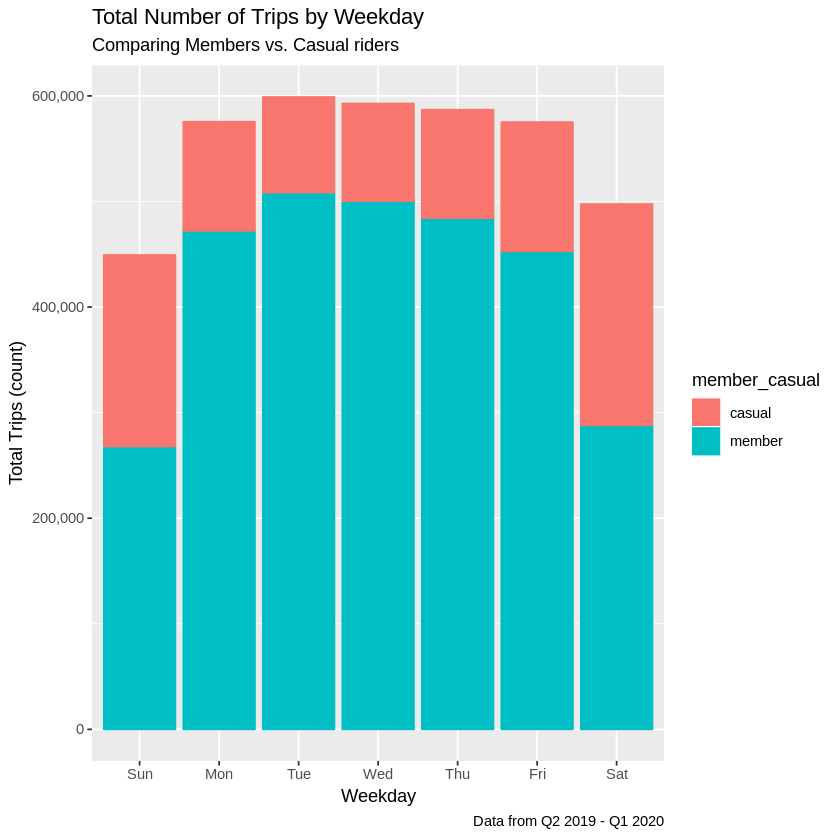

In [19]:
avg_duration_plot <- ggplot(total_rides, aes(x = weekday, y = average_duration, fill = member_casual, color = member_casual)) +
    geom_bar(stat = 'identity')+
    labs(title = "Average Trip Length by Weekday", subtitle = "Comparing Members vs. Casual riders", x = "Weekday", y = "Average trip length (mins)", caption = "Data from Q2 2019 - Q1 2020")
ggsave("avg_duration_plot.png")
avg_duration_plot
num_rides_plot <- ggplot(total_rides, aes(x = weekday, y = number_of_rides, fill = member_casual, color = member_casual)) +
    geom_bar(stat = 'identity') +
    scale_y_continuous(labels = comma) +
    labs(title = "Total Number of Trips by Weekday", subtitle = "Comparing Members vs. Casual riders", x = "Weekday", y = "Total Trips (count)", caption = "Data from Q2 2019 - Q1 2020")
ggsave("num_rides_plot.png")
num_rides_plot

### Observation of Day of the Week
* Casual riders consistantly have a longer trip duration close to 80 mins; members trip durations stays under 20 mins.
* Casual riders take more trips on the weekends; Members take more trips during the week. 

In [20]:
total_rides_hour <- all_trips_v2 %>% 
    mutate(hour = as.factor(hour(started_at))) %>%
    group_by(member_casual, hour) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length_min)) %>%
    arrange(member_casual, hour)

print(total_rides_hour)
write.csv(total_rides_hour,"total_ride_hour.csv")


# A tibble: 48 x 4
# Groups:   member_casual [2]
   member_casual hour  number_of_rides average_duration
   <chr>         <fct>           <int>            <dbl>
 1 casual        0                8363            104. 
 2 casual        1                5495            104. 
 3 casual        2                3361            104. 
 4 casual        3                1982            170. 
 5 casual        4                1196            127. 
 6 casual        5                2690             99.0
 7 casual        6                6291             66.4
 8 casual        7               13302             32.2
 9 casual        8               22304             54.8
10 casual        9               29057             68.2
# … with 38 more rows


Saving 6.67 x 6.67 in image


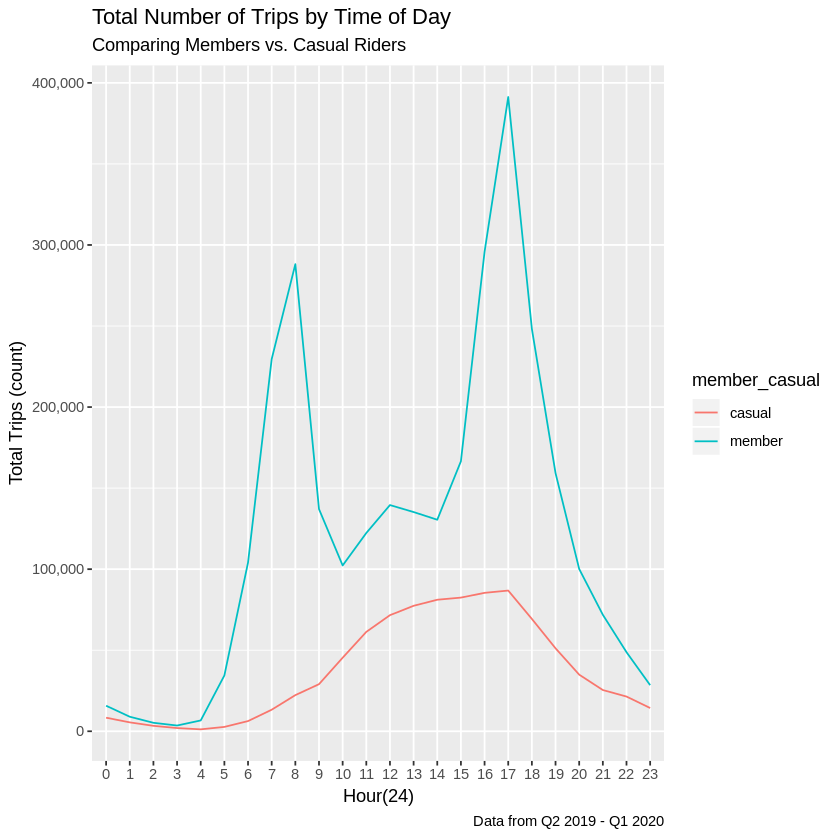

In [21]:
trip_time_plot <- ggplot(data = total_rides_hour) +
    geom_line(mapping = aes(x = hour, y = number_of_rides, group = member_casual, color = member_casual)) + 
    scale_y_continuous(labels = comma) +
    labs(title = "Total Number of Trips by Time of Day",
        subtitle = "Comparing Members vs. Casual Riders",
        caption = "Data from Q2 2019 - Q1 2020",
        x = "Hour(24)",
        y = "Total Trips (count)")
ggsave("trip_time_plot.png")
trip_time_plot


### Observations
Members ride most 6am - 9am & 3pm - 6pm
Casual riders have more consistent rides between 10am - 8pm with the highest ridership between noon & 5pm

# Conclusion
Casual riders are more frequent on the weekends between 12pm and 5pm, taking trips on average of four times longer than members

# Next Steps
* Analyze any outliers for long trips. This data shows trips lasting days. Match with policies of bike return to reanalyze averages.
* Look at the most popular stations for Casual riders
* Measure the cost difference for the average casual ride vs member rides.

## Possible further analysis to look at most popular stations

In [22]:
total_rides_station <- all_trips_v2 %>% 
    group_by(member_casual, start_station_name) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length_min)) %>%
    arrange(member_casual, -number_of_rides, start_station_name)
head(total_rides_station)

member_casual,start_station_name,number_of_rides,average_duration
casual,Streeter Dr & Grand Ave,53415,49.13914
casual,Lake Shore Dr & Monroe St,39686,49.18074
casual,Millennium Park,21901,55.17666
casual,Michigan Ave & Oak St,21633,55.62247
casual,Shedd Aquarium,20781,37.67663
casual,Lake Shore Dr & North Blvd,19150,46.10948


## Looking at data by month

In [23]:
total_rides_month <- all_trips_v2 %>% 
    group_by(member_casual, month) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length_min)) %>%
    arrange(member_casual, month)
print(total_rides_month)
write.csv(total_rides_month, "total_rides_month.csv")

# A tibble: 24 x 4
# Groups:   member_casual [2]
   member_casual month number_of_rides average_duration
   <chr>         <chr>           <int>            <dbl>
 1 casual        01               7785            162. 
 2 casual        02              12314            133. 
 3 casual        03              24615             70.8
 4 casual        04              47744             50.9
 5 casual        05              81624             51.2
 6 casual        06             130218             45.9
 7 casual        07             175632             59.8
 8 casual        08             186889             67.0
 9 casual        09             129173             51.7
10 casual        10              71035             59.0
# … with 14 more rows


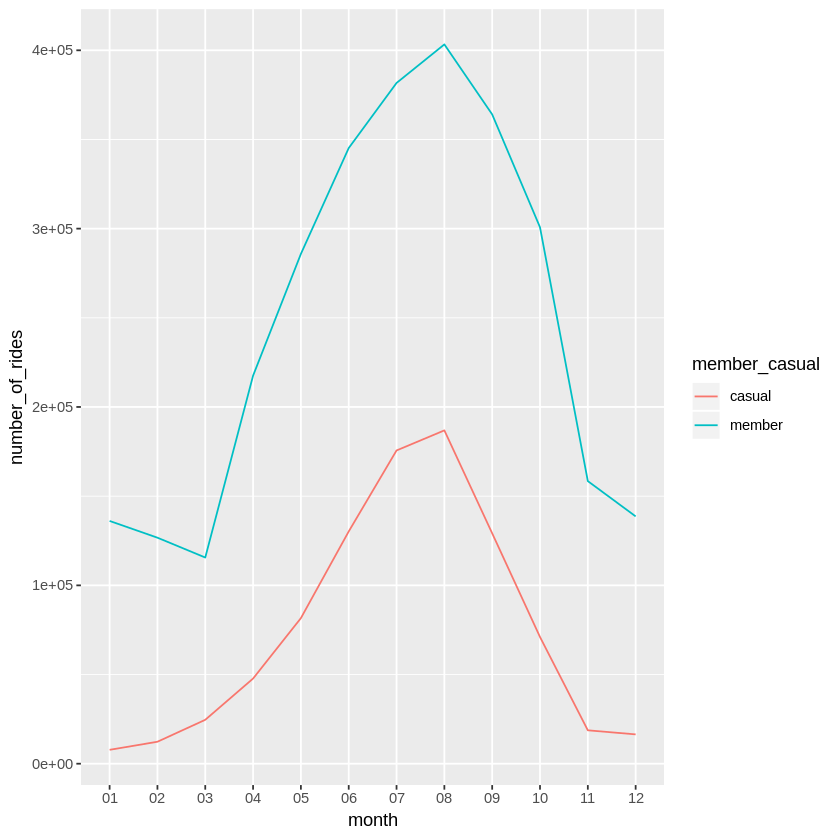

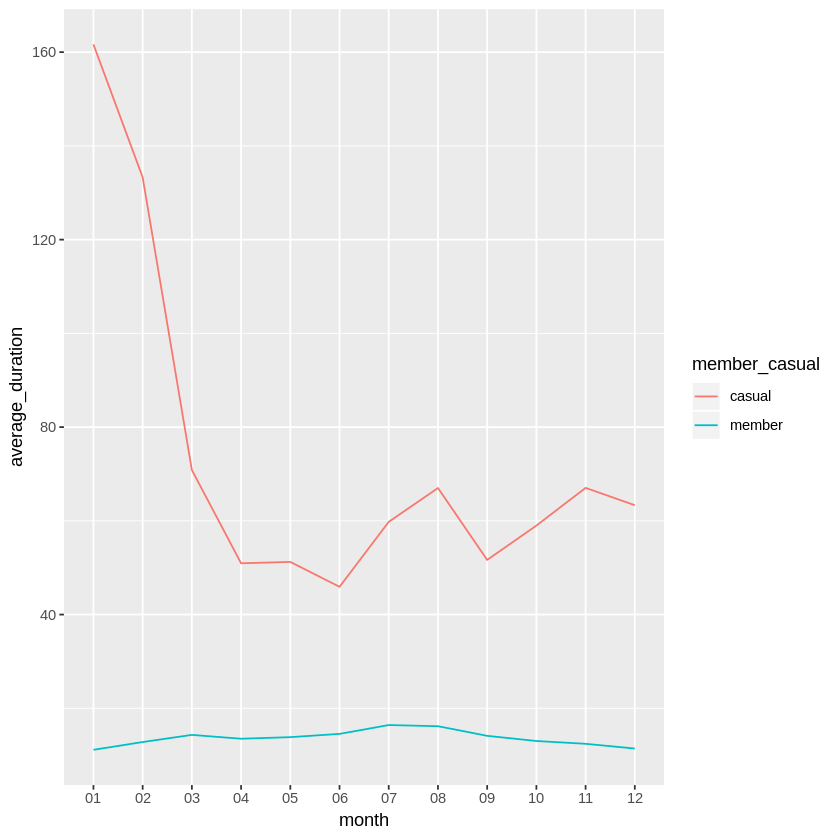

In [24]:
ggplot(data = total_rides_month) +
    geom_line(mapping = aes(x = month, y = number_of_rides, group = member_casual, color = member_casual))
ggplot(data = total_rides_month) +
    geom_line(mapping = aes(x = month, y = average_duration, group = member_casual, color = member_casual))

Months 4 - 12 are from 2019, while 1 - 3 are from 2020. This makes the chart not chronological and not the best visualization. Analyzing month rides would be most helpful with multiple full years of data.

More data cleaning would be required to remove outliers.